# Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Lokasi dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Eksplorasi Data

In [2]:
print("Data Training:")
train.info()
print("")
print("Data Testing:")
test.info()

Data Training:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Data Testing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non

# Distribusi Data

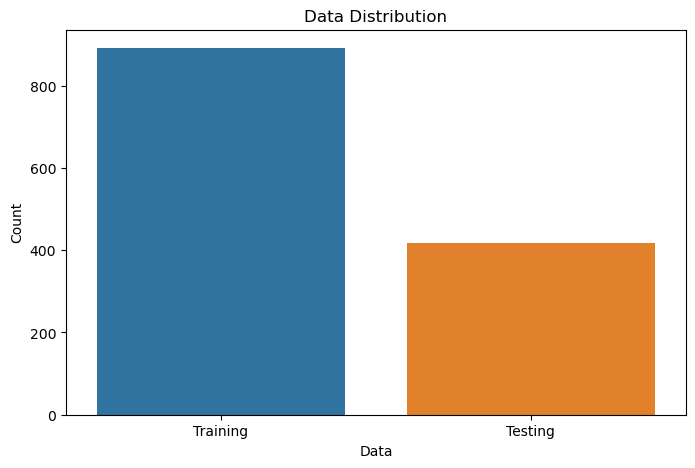

In [3]:
train_data_len = len(train)
test_data_len = len(test)

data_counts = pd.DataFrame({'Data': ['Training', 'Testing'], 'Count': [train_data_len, test_data_len]})

plt.figure(figsize=(8, 5))
sns.barplot(x='Data', y='Count', data=data_counts)
plt.title('Data Distribution')
plt.xlabel('Data')
plt.ylabel('Count')
plt.show()

# Persentase Data

In [4]:
train_data_percent = train_data_len / (train_data_len + test_data_len) * 100
test_data_percent = test_data_len / (train_data_len + test_data_len) * 100

print("Data Training Percentage: {:.2f}%".format(train_data_percent))
print("Data Testing Percentage: {:.2f}%".format(test_data_percent))

Data Training Percentage: 68.07%
Data Testing Percentage: 31.93%


# Penggabungan Data

In [5]:
all = pd.concat([train, test], sort=False)
all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


# Mengatur Data Kosong

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


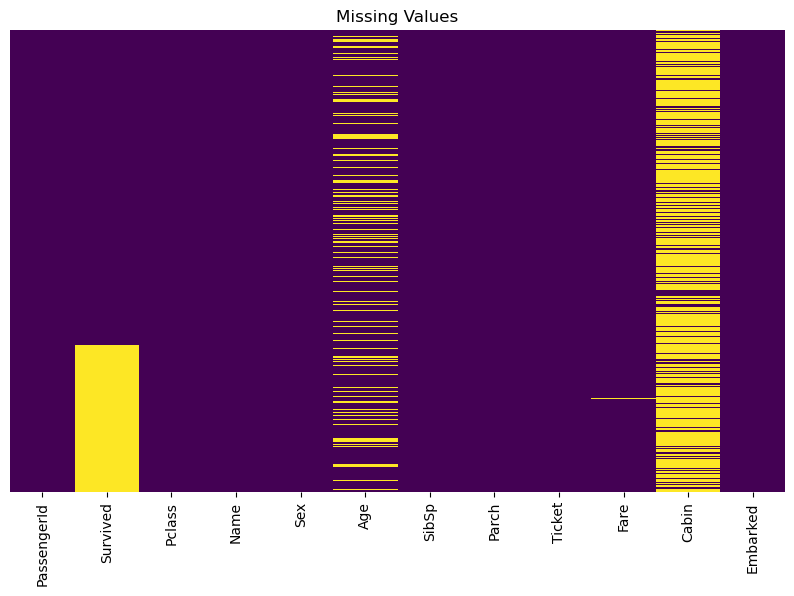

In [6]:
missing_values = all.isnull().sum()
print(missing_values)

plt.figure(figsize=(10, 6))
sns.heatmap(all.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Sur

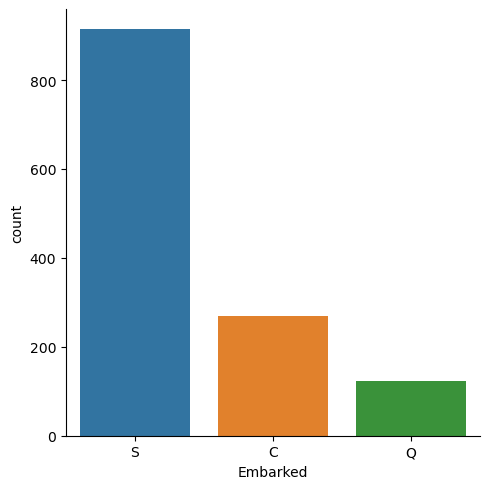

In [7]:
all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())
all.info()
print("")
sns.catplot(x='Embarked', kind='count', data=all)
print("")
all['Embarked'] = all['Embarked'].fillna('S')
all.info()

# Transformasi Data

In [15]:
all.loc[all['Age'] <= 16, 'Age'] = 0
all.loc[(all['Age'] > 16) & (all['Age'] <= 32), 'Age'] = 1
all.loc[(all['Age'] > 32) & (all['Age'] <= 48), 'Age'] = 2
all.loc[(all['Age'] > 48) & (all['Age'] <= 64), 'Age'] = 3
all.loc[all['Age'] > 64, 'Age'] = 4

import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    if title_search:
        return title_search.group(1)
    return ""

all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [16]:
all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()

Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [18]:
all['Cabin'] = all['Cabin'].fillna('Missing')
all['Cabin'] = all['Cabin'].str[0]
all['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [19]:
all['FamilySize'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['FamilySize'] == 1, 'IsAlone'] = 1

# Split Data

In [9]:
all_1 = all.drop(['Name', 'Ticket'], axis=1)
all_1.head()

all_dummies = pd.get_dummies(all_1, drop_first=True)
all_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,...,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,1,0.0,3,1.0,1,0,7.2500,2,0,1,...,1,0,0,1,0,0,1,0,0,0
1,2,1.0,1,2.0,1,0,71.2833,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,3,1.0,0,0,7.9250,1,1,0,...,1,0,0,1,0,1,0,0,0,0
3,4,1.0,1,2.0,1,0,53.1000,2,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,0.0,3,2.0,0,0,8.0500,1,1,1,...,1,0,0,1,0,0,1,0,0,0


In [10]:
all_train = all_dummies[all_dummies['Survived'].notna()]
all_train.info()
print("")
 
all_test = all_dummies[all_dummies['Survived'].isna()]
all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    float64
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   FamilySize      891 non-null    int64  
 8   IsAlone         891 non-null    int64  
 9   Sex_male        891 non-null    uint8  
 10  Cabin_B         891 non-null    uint8  
 11  Cabin_C         891 non-null    uint8  
 12  Cabin_D         891 non-null    uint8  
 13  Cabin_E         891 non-null    uint8  
 14  Cabin_F         891 non-null    uint8  
 15  Cabin_G         891 non-null    uint8  
 16  Cabin_M         891 non-null    uint8  
 17  Cabin_T         891 non-null    uin

# Modeling Adaboost

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [12]:
X_train = all_train.drop(['PassengerId', 'Survived'], axis=1)
y_train = all_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=101)

random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# Evaluasi Model

In [13]:
train_predictions = random_forest.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

test_predictions = random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("")
X_test = all_test.drop(['PassengerId', 'Survived'], axis=1)
test_predictions = random_forest.predict(X_test[:10])

passenger_ids = all_test['PassengerId'][:10]
test_results = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': test_predictions})
print("")
print(test_results)

Training Accuracy: 0.9508426966292135
Testing Accuracy: 0.8100558659217877


   PassengerId  Survived
0          892       0.0
1          893       0.0
2          894       0.0
3          895       0.0
4          896       0.0
5          897       0.0
6          898       0.0
7          899       0.0
8          900       1.0
9          901       0.0


# Test Size 0,3

In [14]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_data_len = len(train)
test_data_len = len(test)

all = pd.concat([train, test], sort=False)

all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())

all['Embarked'] = all['Embarked'].fillna('S')

all.loc[all['Age'] <= 16, 'Age'] = 0
all.loc[(all['Age'] > 16) & (all['Age'] <= 32), 'Age'] = 1
all.loc[(all['Age'] > 32) & (all['Age'] <= 48), 'Age'] = 2
all.loc[(all['Age'] > 48) & (all['Age'] <= 64), 'Age'] = 3
all.loc[all['Age'] > 64, 'Age'] = 4

import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    if title_search:
        return title_search.group(1)
    return ""

all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()

all['Cabin'] = all['Cabin'].fillna('Missing')
all['Cabin'] = all['Cabin'].str[0]
all['Cabin'].value_counts()

all['FamilySize'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['FamilySize'] == 1, 'IsAlone'] = 1

all_1 = all.drop(['Name', 'Ticket'], axis=1)

all_dummies = pd.get_dummies(all_1, drop_first=True)
all_train = all_dummies[all_dummies['Survived'].notna()]


all_test = all_dummies[all_dummies['Survived'].isna()]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train = all_train.drop(['PassengerId', 'Survived'], axis=1)
y_train = all_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=101)

random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)

train_predictions = random_forest.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

test_predictions = random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("")
X_test = all_test.drop(['PassengerId', 'Survived'], axis=1)
test_predictions = random_forest.predict(X_test[:10])

passenger_ids = all_test['PassengerId'][:10]
test_results = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': test_predictions})
print("")
print(test_results)

Training Accuracy: 0.9534510433386838
Testing Accuracy: 0.7985074626865671


   PassengerId  Survived
0          892       0.0
1          893       0.0
2          894       0.0
3          895       0.0
4          896       1.0
5          897       0.0
6          898       0.0
7          899       0.0
8          900       1.0
9          901       0.0
